# Notebook 15: Graph Partitioning
***

In this notebook we'll partition some graphs using the spectral graph partitioning method that we looked at in lecture.

We'll need numpy and matplotlib.pyplot for this notebook, so let's load them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

### Exercise 1: Constructing the Graph Laplacian

For the graph depicted below, construct the graph Laplacian matrix $L = D-A$, where $D$ is the diagonal **degree matrix** and $A$ is the **adjacency matrix**. Recall that for an undirected graph, the adjacency matrix must necessarily be symmetric.

<img width=130px src="http://www.cs.colorado.edu/~anwo7157/home/resources/socialnetwork1.png">


In [2]:
# J = 0; B = 1; D = 2; A = 3

# adjacency matrix
A = np.array([[0,1,1,1],
              [1,0,0,0],
              [1,0,0,1],
              [1,0,1,0]])

# degree matrix
D = np.diag([np.sum(A[k,:]) for k in range(A.shape[0])])

# graph laplacian matrix
L = D - A
print(L)

[[ 3 -1 -1 -1]
 [-1  1  0  0]
 [-1  0  2 -1]
 [-1  0 -1  2]]


<br>

### Exercise 2: Getting the weights

Obtain the partitioning weights for each node in the graph from **Exercise 1** by computing the eigenvalues and eigenvectors associated with the graph Laplacian. Complete the code below to do this.

In [3]:
# Find the eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(L)

# Check that the smallest eigenvalue is 0
evals_sorted = np.sort(evals)
print("Smallest eigenvalue is: {:0.4f}".format(evals_sorted[0]))

# Get the index of the second-smallest eigenvalue
idx_x2 = -1 # TODO

# Get x2, the eigenvector associated with the second-smallest eigenvalue
x2 = [0,0,0,0]  # TODO
print(x2)

Smallest eigenvalue is: 0.0000
[0, 0, 0, 0]


In [4]:
# Find the eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(L)

print(evecs)
print(evals)

# Check that the smallest eigenvalue is 0
evals_sorted = np.sort(evals)
print("Smallest eigenvalue is: {:0.4f}".format(evals_sorted[0]))

# Get the index of the second-smallest eigenvalue
idx_x2 = list(evals).index(evals_sorted[1])
print(idx_x2)
# Get x2, the eigenvector associated with the second-smallest eigenvalue
x2 = evecs[:,idx_x2]
print(x2)

[[ 8.66025404e-01 -5.00000000e-01  0.00000000e+00 -9.06493304e-17]
 [-2.88675135e-01 -5.00000000e-01  8.16496581e-01  9.37381314e-17]
 [-2.88675135e-01 -5.00000000e-01 -4.08248290e-01 -7.07106781e-01]
 [-2.88675135e-01 -5.00000000e-01 -4.08248290e-01  7.07106781e-01]]
[4.00000000e+00 2.22044605e-16 1.00000000e+00 3.00000000e+00]
Smallest eigenvalue is: 0.0000
2
[ 0.          0.81649658 -0.40824829 -0.40824829]


The code cell below generates a plot of the nodes' indices along the horizontal axis against the nodes' partitioning weights (components in $\vec{x}_2$) along the vertical axis.

1. If you had to partition this graph into three components, what would they be?
1. What about if you had to partition the graph into two components?
1. Copy-paste the plotting code into a new cell and modify it so the nodes are plotted according to increasing $\vec{x}_2$ component, as seen in the figures in the lecture slides.

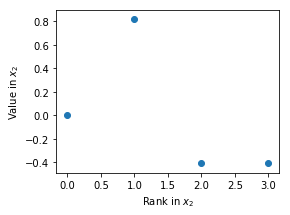

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.scatter(list(range(4)), x2)
plt.xlabel('Rank in $x_2$')
plt.ylabel('Value in $x_2$');

<br>

### Exercise 3: Partitioning a bit bigger

Based on the `neighbors` dictionary, which contains adjacency information for the graph depicted below, construct the adjacency matrix $A$, the degree matrix $D$ and the graph Laplacian $L$.

<img width=260px src="http://www.cs.colorado.edu/~anwo7157/home/resources/graphpartitioning1.png">

Without actually computing the eigenvalues/-vectors, which clusters would you create if you were tasked with partitioning the graph into three components? What about two components?

In [6]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,5], 4 : [3,5,6], \
             5 : [3,4,6,7,8,9], 6 : [4,5], 7 : [5,8], 8 : [5,7,9], 9 : [5,8]}

In [7]:
# SOLUTION:

D = np.diag([len(neighbors[node]) for node in nodes])
A = np.zeros((N,N))
for n1 in nodes:
    for n2 in nodes:
        if n2 in neighbors[n1]:
            A[n1,n2] = 1
L = D - A

Use the spectral graph partitioning method to determine the partitioning weights for each node in this graph.

Then, create a plot of the rank of each node in the second eigenvector against the value in the second eigenvector (like in **Exercise 2**).

Finally, what clusters would you create if you wanted to partition the graph into...
1. two clusters?
1. three clusters?
1. four clusters?

You may find it useful to compute/plot other eigenvectors.

In [8]:
# SOLUTION:

evals, evecs = np.linalg.eig(L)

# check that the smallest eigenvalue is 0
evals_sorted = np.sort(evals)
print("Smallest eigenvalue is: {:0.4f}".format(evals_sorted[0]))

# get the index of the second-smallest eigenvalue
idx_x2 = list(evals).index(evals_sorted[1])

# get the eigenvector associated with the second-smallest eigenvalue
x2 = evecs[:,idx_x2]
print(np.round(x2,4))

Smallest eigenvalue is: -0.0000
[-0.5024 -0.4028 -0.4028 -0.1437  0.0898  0.1981  0.1795  0.3281  0.3281
  0.3281]


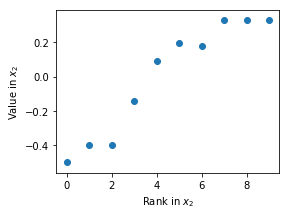

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.scatter(list(range(N)), x2)
plt.xlabel('Rank in $x_2$')
plt.ylabel('Value in $x_2$');